# PCA and SVM : R5 - Project2 - Vehicle

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: 
a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles

Total points: 30


The points distribution for this case is as follows:

1. Use a new Python notebook and read the data set. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)


### Problem statement : 

This is multi-class classification problem. In the vehicle dataset we have around 846 rows and 19 columns, in this "Class" cloumn is our Target variable.
It's contains unique set of value like ['Bus', 'Van', 'Car']. 
In this multi-classification prediction we will use PCA technique to reduce dimension and SVM model.

### Approach to Solve this problem:

1. Read vehicle data from vehicle.csv file using Pandas
2. Find out data shape, column info about vehicle data using Pandas and numpy
3. Treat missing value in the vehicle data frame. Replace missing value with median
4. Get statistical description of vehicle dataframe
5. Use boxplot to findout any outlier and remove the outlier if any
6. Find relationship between each feature using pair matrix plot and correlation
7. Standardize the data using StandardScaler
8. Will use PCA technic to reduce feature dimensions
9. Will use SVM for modelling as requested and will use grid search CV to find out best hyper parameter for SVM model
10. Final conclusion.

In [1]:
# Import numpy & pandas library to handle data 
import numpy as np   
import pandas as pd  

from sklearn.model_selection import train_test_split, cross_val_score,KFold,GridSearchCV
from scipy.stats import zscore

# Import StandardScaler
from sklearn.preprocessing import StandardScaler
#Import PCA 
from sklearn.decomposition import PCA
from sklearn import preprocessing

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

## Questions : 

### 1. Use a new Python notebook and read the data set. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [2]:
# reading the CSV file into pandas dataframe
vehicle_df = pd.read_csv("vehicle.csv")  

In [3]:
# Check top few records to get a feel of the data structure
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
# get vehicle data set
vehicle_df.shape

(846, 19)

In [ ]:
# Total row in the data set is 846
# No. of Column in the dataset is 19

In [5]:
#Get information about each column
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [92]:
#Check is there any missing value in the Vehicle Dataframe
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
#Look like there is null value in the data set, we need to impute NULL value to median in the vehicle dataset

In [8]:
#impute nan values for the columns with median
vehicle_df=vehicle_df.fillna(vehicle_df.median())

In [9]:
#After impute operation check any column having NULL value.
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [11]:
#Get statistical description of vehicle dataset 
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [25]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Box Plot

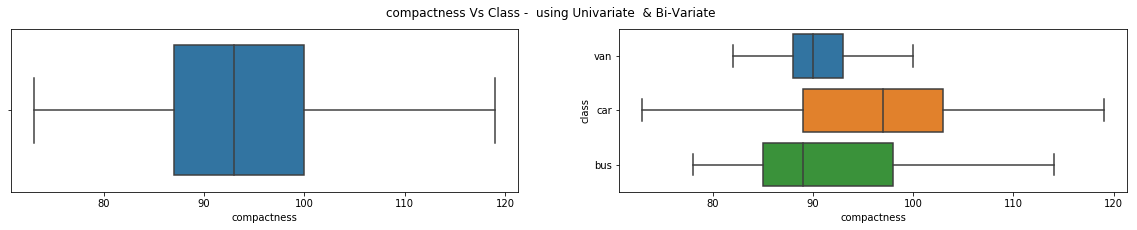

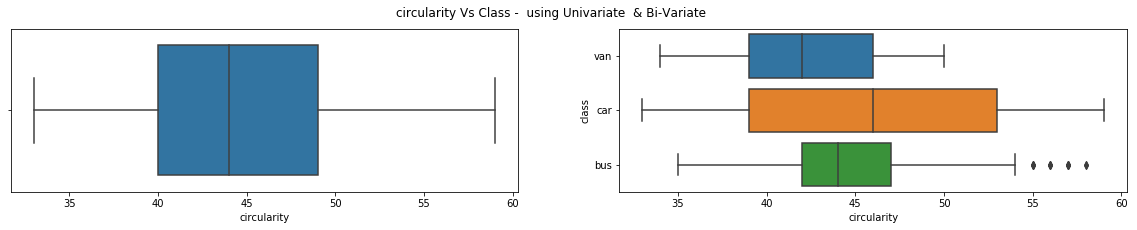

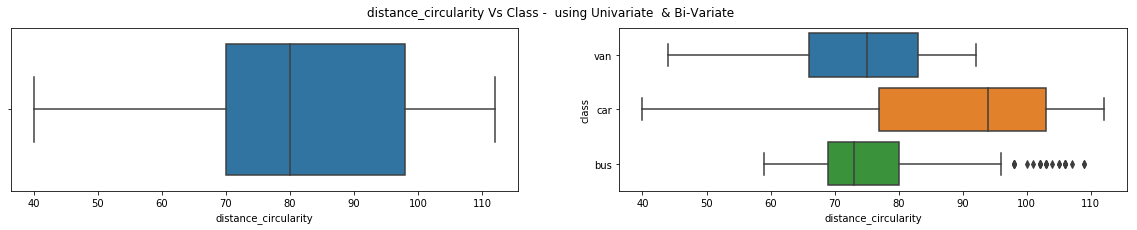

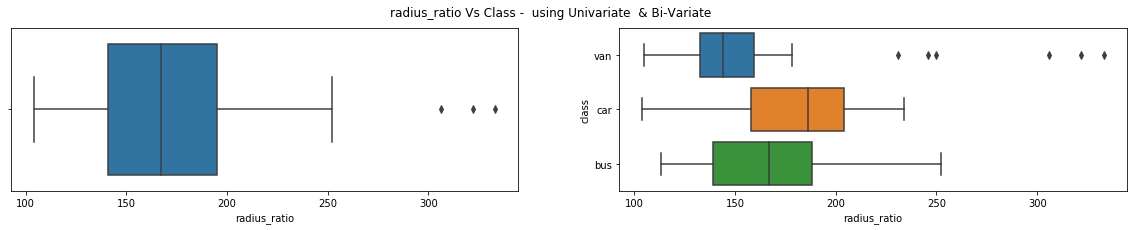

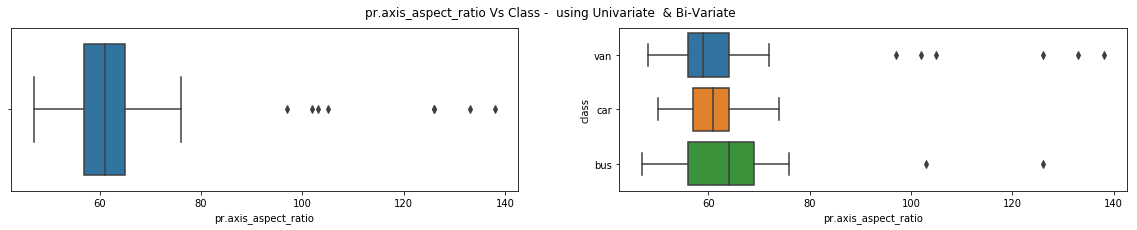

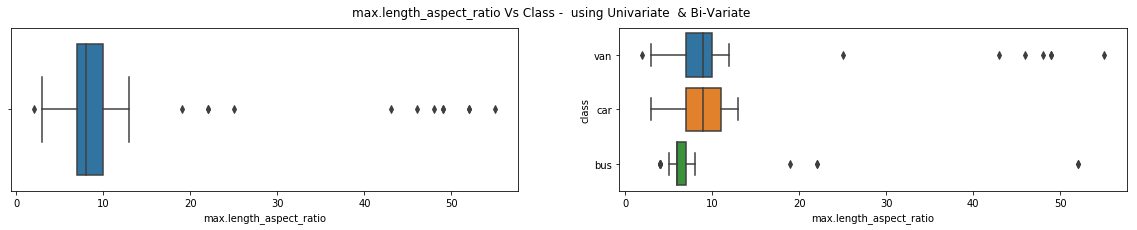

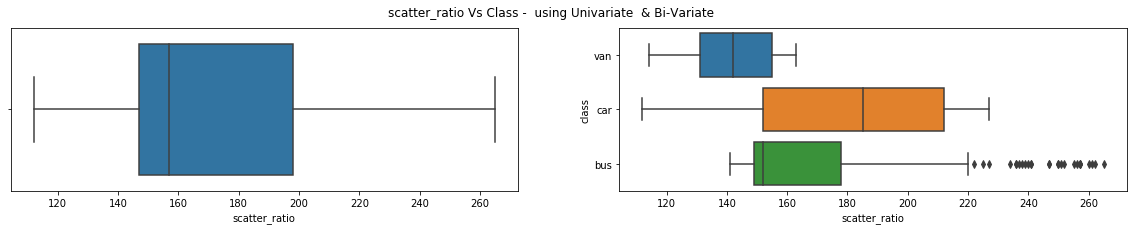

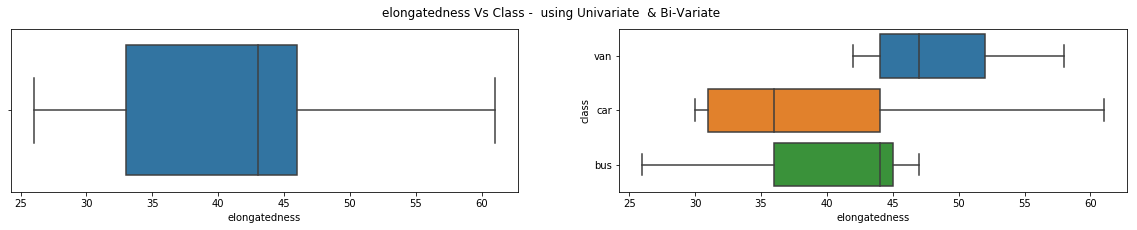

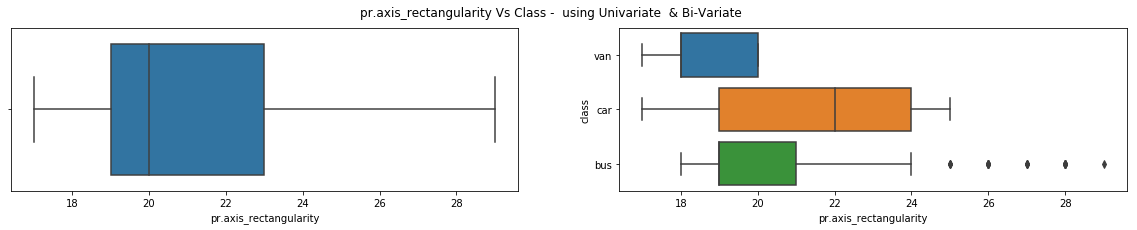

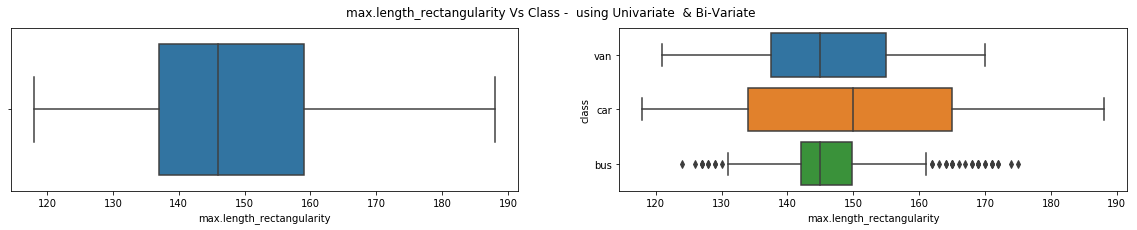

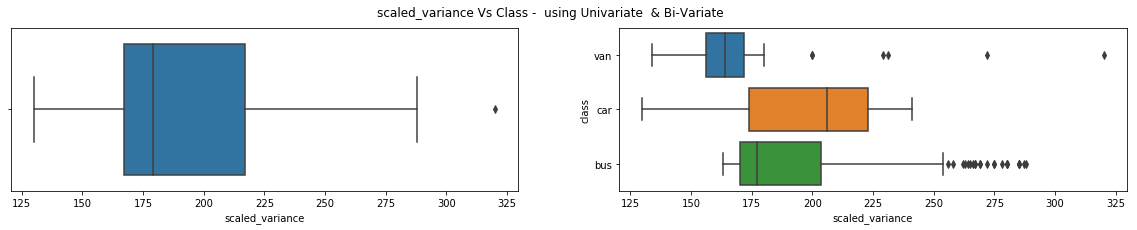

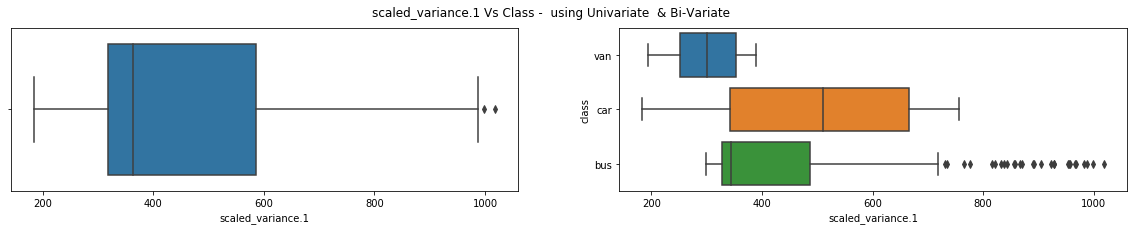

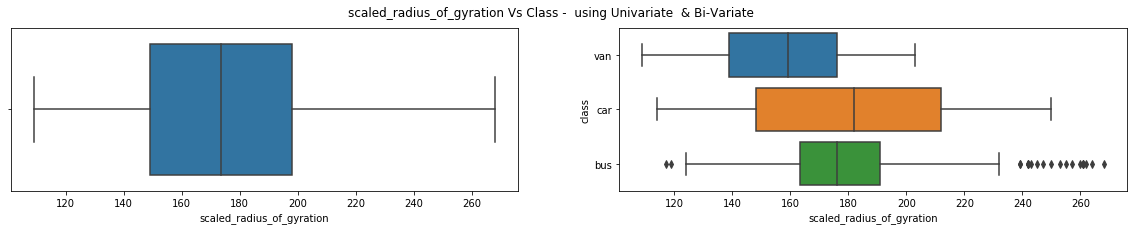

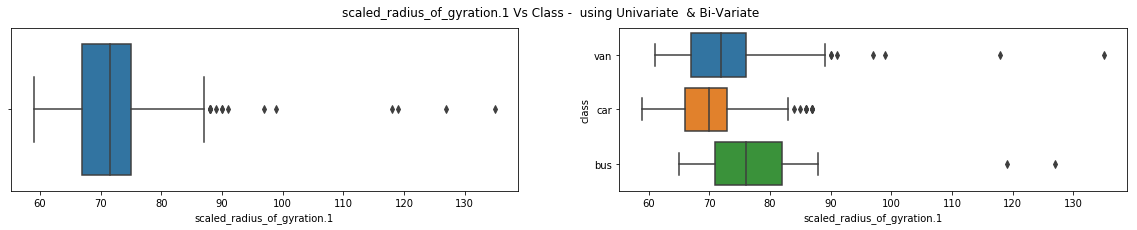

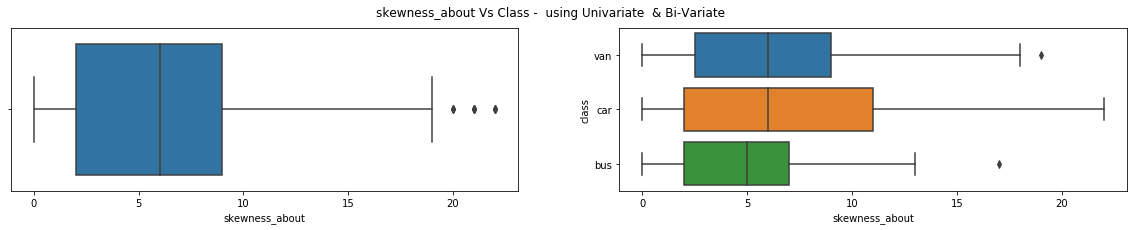

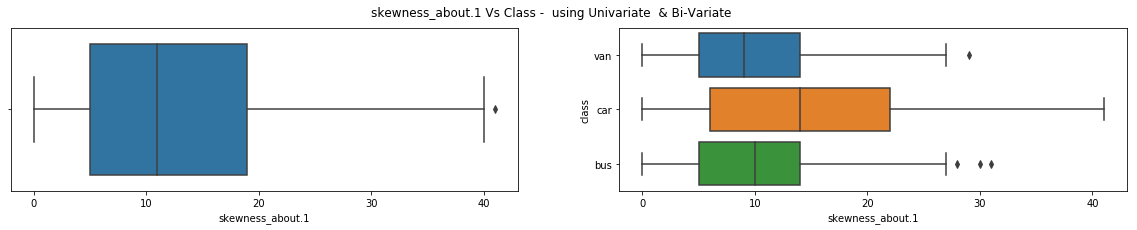

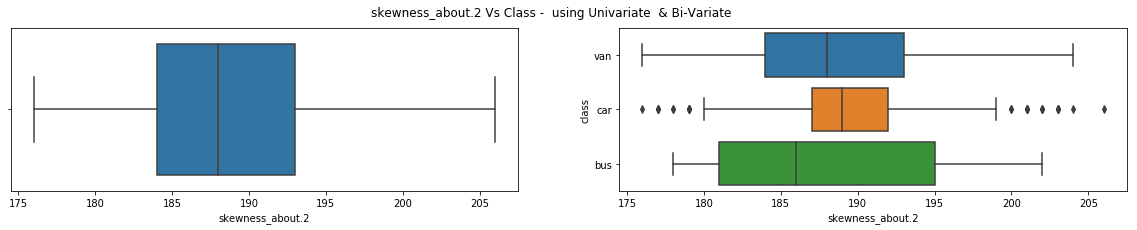

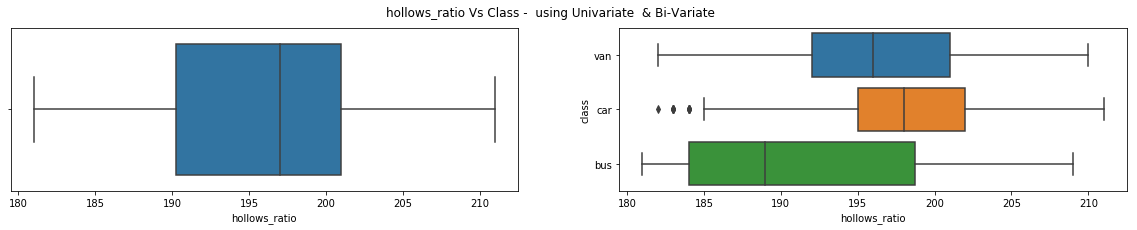

In [27]:
#Draw a boxplot for each column in the dataframe 
# 1. Uni-Variate Boxplot for each column
# 2. Bi-Variate Boxplot for each column vs Class
# This box plot help us to find out if any outlier in the dataframe and how data are distributed
for col in vehicle_df.columns:
    if(col != 'class'):
        a4_dims = (20, 3)
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=a4_dims)
        fig.subplots_adjust(hspace=0.2)
        fig.suptitle(col+' Vs Class -  using Univariate  & Bi-Variate')
        sns.boxplot(data=vehicle_df, x=col,ax=ax[0]);
        sns.boxplot(data=vehicle_df, y="class",x=col,ax=ax[1]);

## Boxplot Obervation :
  1. There are upper-bound outliers in the ['radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
       'scaled_variance', 'scaled_variance.1', 
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1'] columns. This upper bound outlier need to be removed.
  2. There are more upper-bound outlier in the 'pr.axis_aspect_ratio', 'max.length_aspect_ratio' when compare then other coumns.
  
  3. There are few of upper and lower bond outlier when compare each column with class type.
  4. When we see 'circularity' vs 'Bus' there aer few upper-bound outlier. similarly ['distance_circularity' vs 'Bus'] and [max.length_rectangularity Vs Bus].
  5. There are few outliers in the ['pr.axis_aspect_ratio' Vs 'Van'] AND ['max.length_aspect_ratio' Vs 'Bus'] 
  6. And also ['scaled_radius_of_gyration.1' vs All three cass]
  
        

In [33]:
for col in vehicle_df.columns:
    if(col != 'class'):
        print(col+" - 75 percentile value : {0}".format(np.percentile(vehicle_df[col],75)))
        print(col+" - 25 percentile value : {0}".format(np.percentile(vehicle_df[col],25)))
       

compactness - 75 percentile value : 100.0
compactness - 25 percentile value : 87.0
circularity - 75 percentile value : 49.0
circularity - 25 percentile value : 40.0
distance_circularity - 75 percentile value : 98.0
distance_circularity - 25 percentile value : 70.0
radius_ratio - 75 percentile value : 195.0
radius_ratio - 25 percentile value : 141.0
pr.axis_aspect_ratio - 75 percentile value : 65.0
pr.axis_aspect_ratio - 25 percentile value : 57.0
max.length_aspect_ratio - 75 percentile value : 10.0
max.length_aspect_ratio - 25 percentile value : 7.0
scatter_ratio - 75 percentile value : 198.0
scatter_ratio - 25 percentile value : 147.0
elongatedness - 75 percentile value : 46.0
elongatedness - 25 percentile value : 33.0
pr.axis_rectangularity - 75 percentile value : 23.0
pr.axis_rectangularity - 25 percentile value : 19.0
max.length_rectangularity - 75 percentile value : 159.0
max.length_rectangularity - 25 percentile value : 137.0
scaled_variance - 75 percentile value : 217.0
scaled_v

In [41]:
# Replace Outlier in the Vehicle Data:

# Note : As per best practice  we should consider with domain expert to replace or remove outlier. 
#Sometime outlier make some meaningful in the data.

# In this case, when look above box plot we have outlier in the ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
#'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
# Looks all outerlier only upper quartile range, so we will take 75 percentile value and replace the outlier 
#if data point greater than 75 percentile and replace with 75 percentile value

# In 'radius_ratio' the 75 percentile value is  195
vehicle_df['radius_ratio'] = np.where(vehicle_df['radius_ratio'] > 195, 195, vehicle_df['radius_ratio'])
# In 'pr.axis_aspect_ratio' the 75 percentile value is  65
vehicle_df['pr.axis_aspect_ratio'] = np.where(vehicle_df['pr.axis_aspect_ratio'] > 65, 65, vehicle_df['pr.axis_aspect_ratio'])
# In 'max.length_aspect_ratio' the 75 percentile value is  10
vehicle_df['max.length_aspect_ratio'] = np.where(vehicle_df['max.length_aspect_ratio'] > 10, 10, vehicle_df['max.length_aspect_ratio'])
# In 'scaled_variance' the 75 percentile value is  217
vehicle_df['scaled_variance'] = np.where(vehicle_df['scaled_variance'] > 217, 217, vehicle_df['scaled_variance'])
# In 'scaled_variance.1' the 75 percentile value is  586.75
vehicle_df['scaled_variance.1'] = np.where(vehicle_df['scaled_variance.1'] > 586.75, 586.75, vehicle_df['scaled_variance.1'])
# In 'skewness_about' the 75 percentile value is  9
vehicle_df['skewness_about'] = np.where(vehicle_df['skewness_about'] > 9, 9, vehicle_df['skewness_about'])
# In 'skewness_about.1' the 75 percentile value is  19
vehicle_df['skewness_about.1'] = np.where(vehicle_df['skewness_about.1'] > 19, 19, vehicle_df['skewness_about.1'])
# In 'scaled_radius_of_gyration.1' the 75 percentile value is  75
vehicle_df['scaled_radius_of_gyration.1'] = np.where(vehicle_df['scaled_radius_of_gyration.1'] > 75, 75, vehicle_df['scaled_radius_of_gyration.1'])

In [ ]:
# Now let's see quick simple box plot and make sure all outliers are removed.

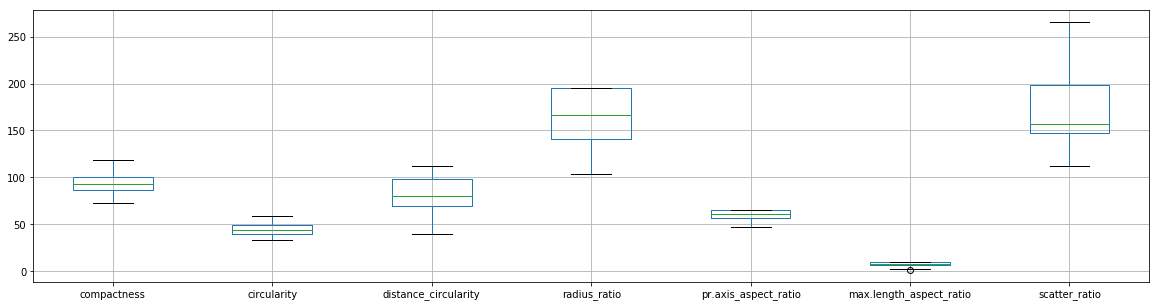

In [36]:
#Box-plot for all column
fig, ax = plt.subplots(figsize=(20,  5))
boxplot = vehicle_df.boxplot(column=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio'],grid=True,ax=ax)

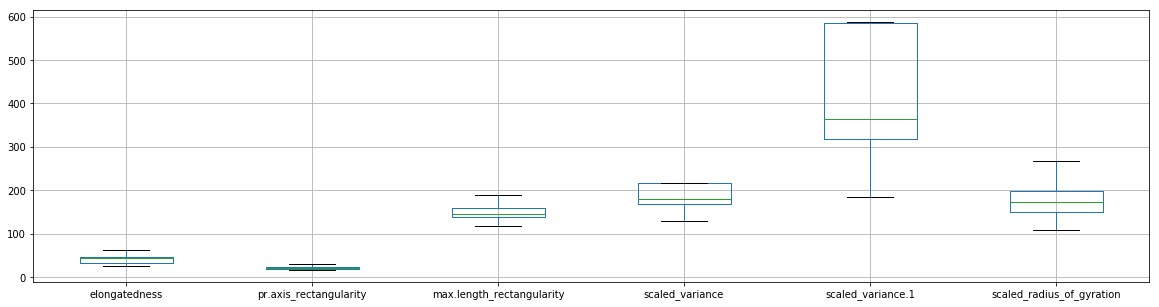

In [37]:
#Box-plot for all column
fig, ax = plt.subplots(figsize=(20,  5))
boxplot = vehicle_df.boxplot(column=['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],grid=True,ax=ax)

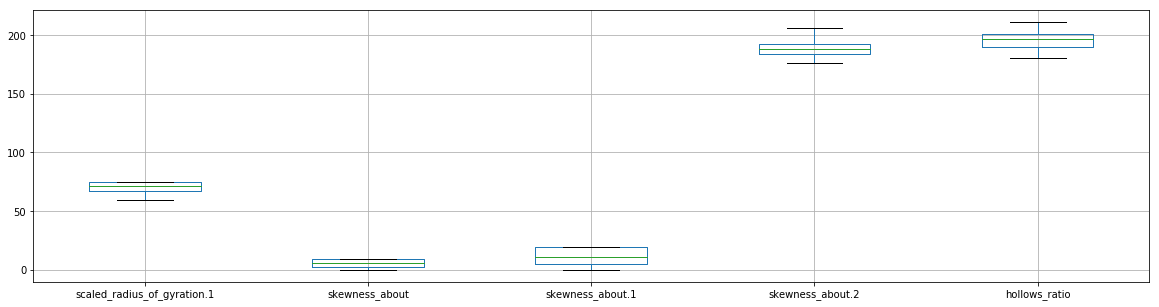

In [42]:
#Box-plot for all column
fig, ax = plt.subplots(figsize=(20,  5))
boxplot = vehicle_df.boxplot(column=['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],grid=True,ax=ax)

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [29]:
#Check the class type count in the vehicle dataframe
vehicle_df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

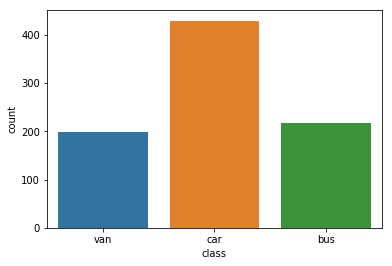

In [28]:
#Check the count distribution of class type in the vehicle dataframe
plot = sns.countplot(x = "class", data = vehicle_df)
plot.set_xticklabels(plot.get_xticklabels());

#### Label Encode the class variable

In [43]:
label_encoder = preprocessing.LabelEncoder() 

vehicle_df['class']= label_encoder.fit_transform(vehicle_df['class']) 

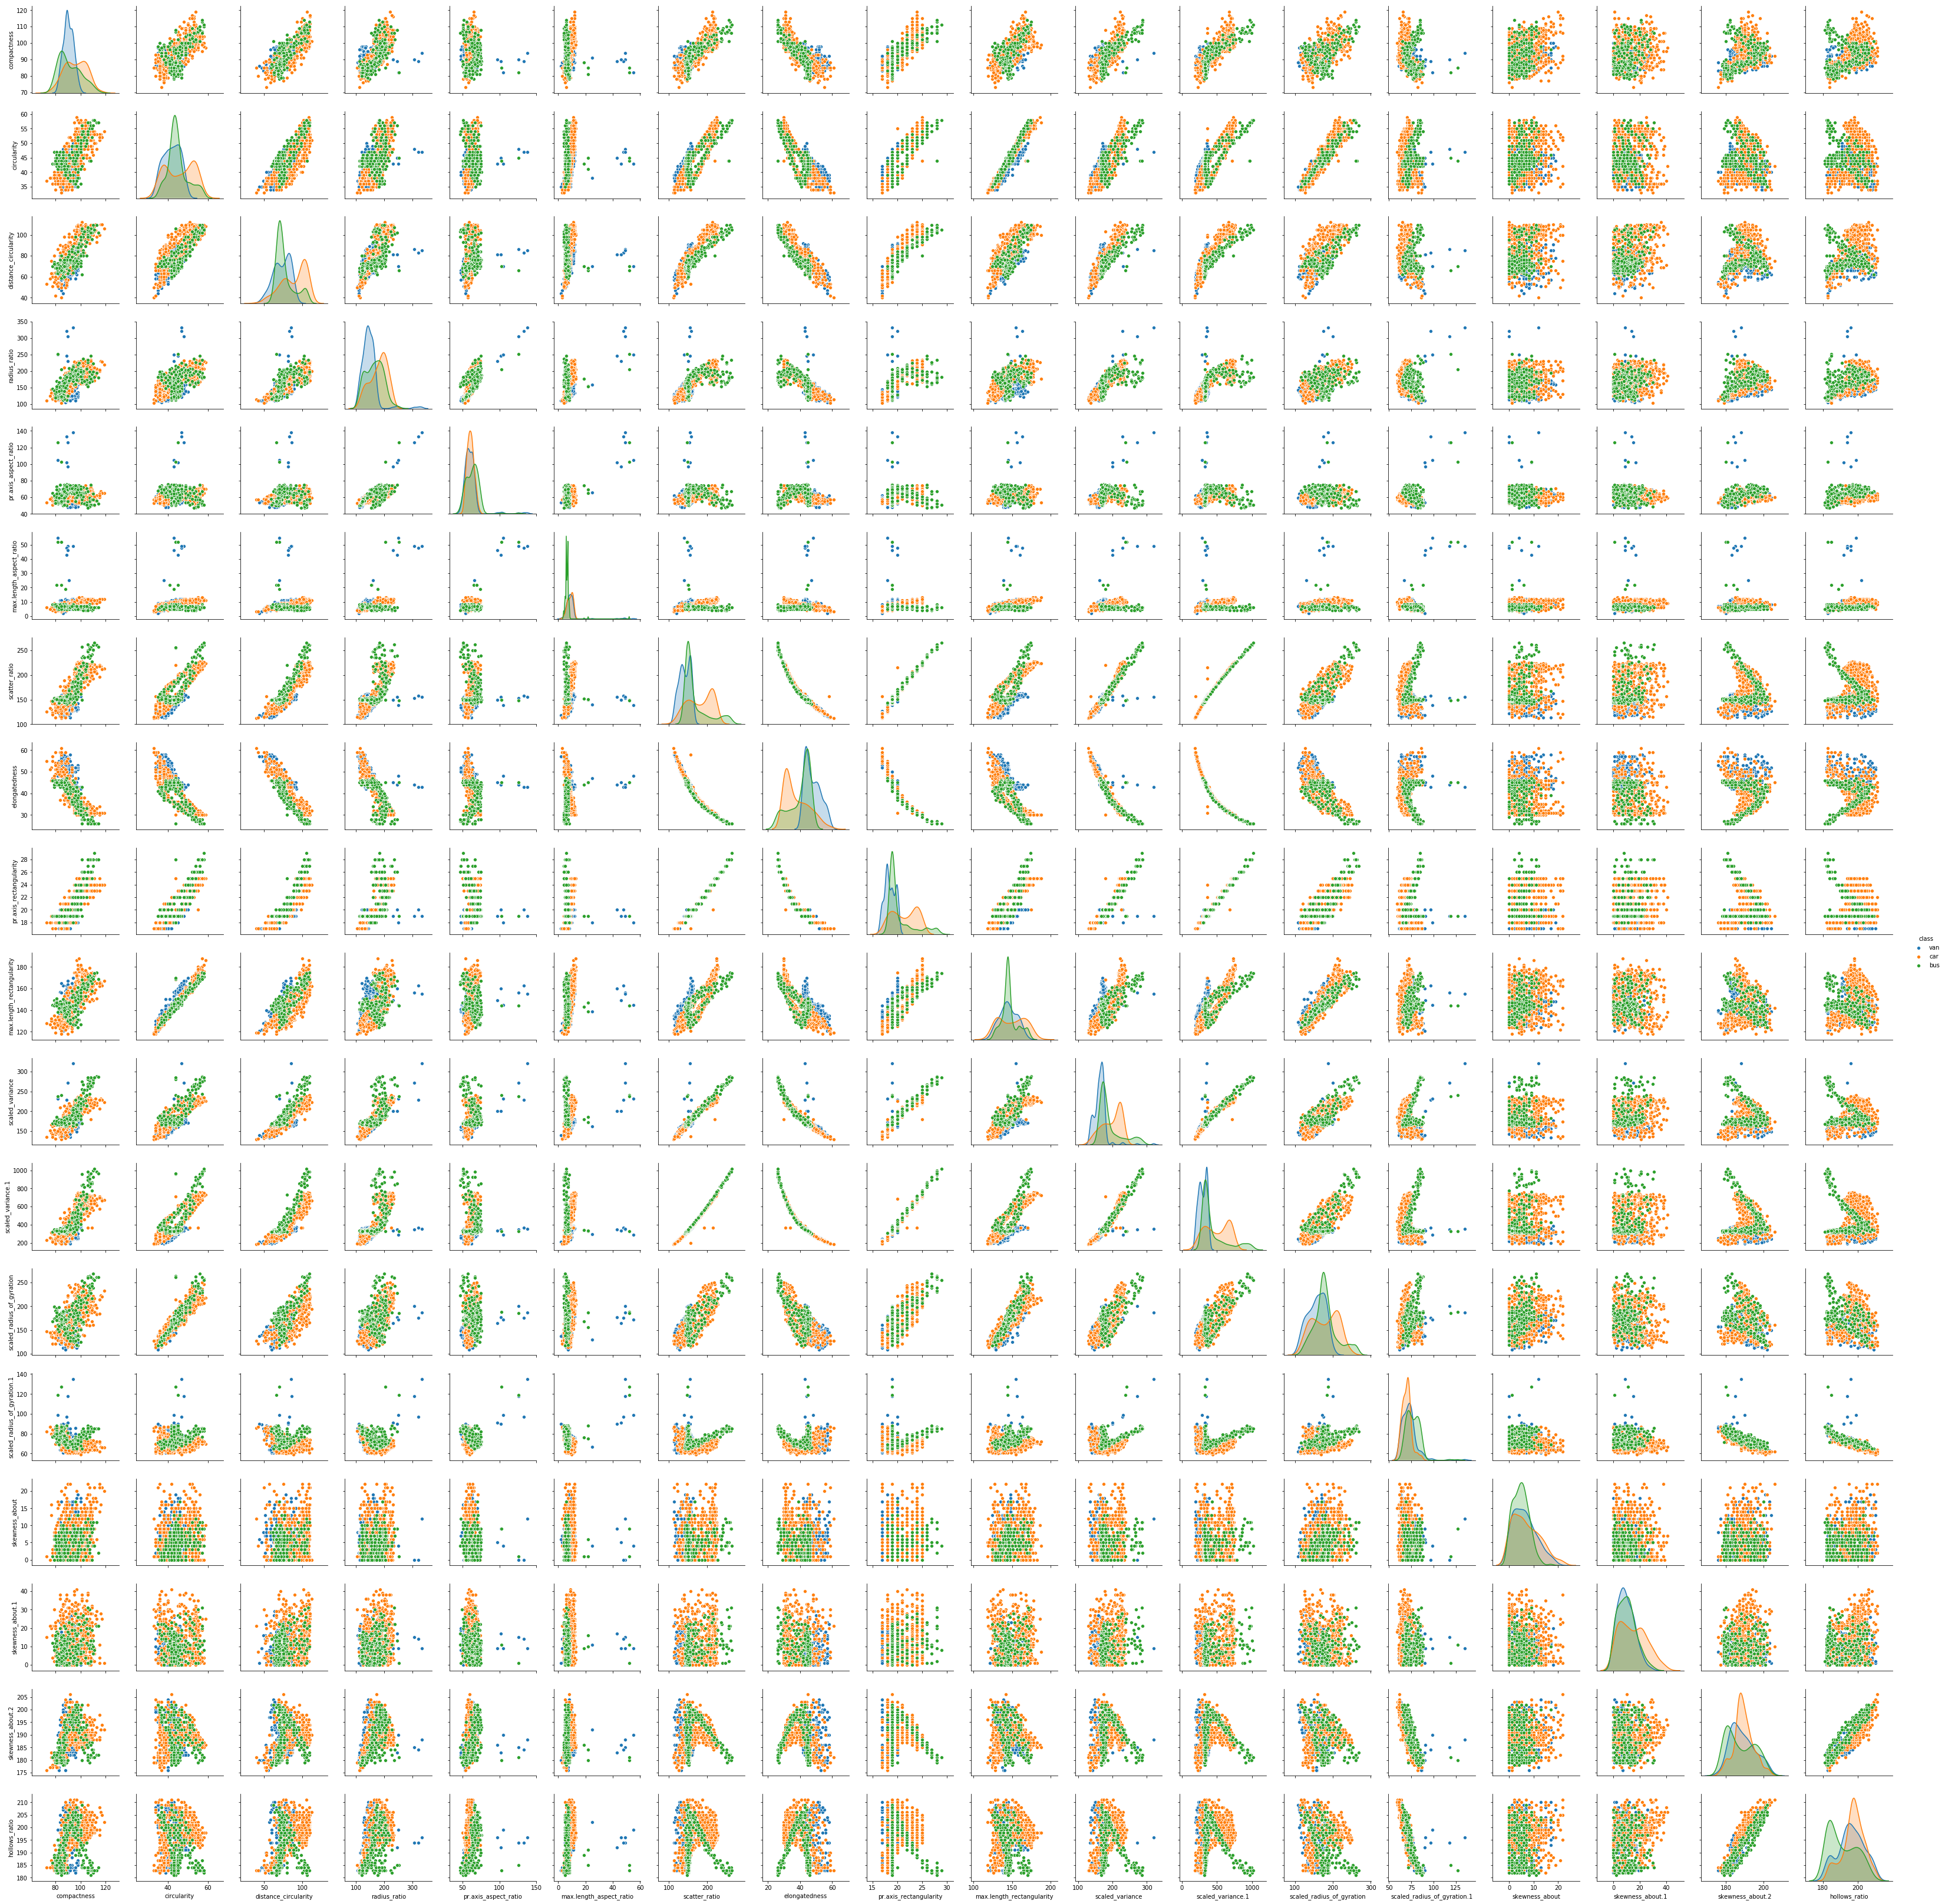

In [33]:
#Pair plot for vehicle data frame which help us to find out relation between different attributes in the data frame
sns.pairplot(vehicle_df, diag_kind='kde',hue='class') 

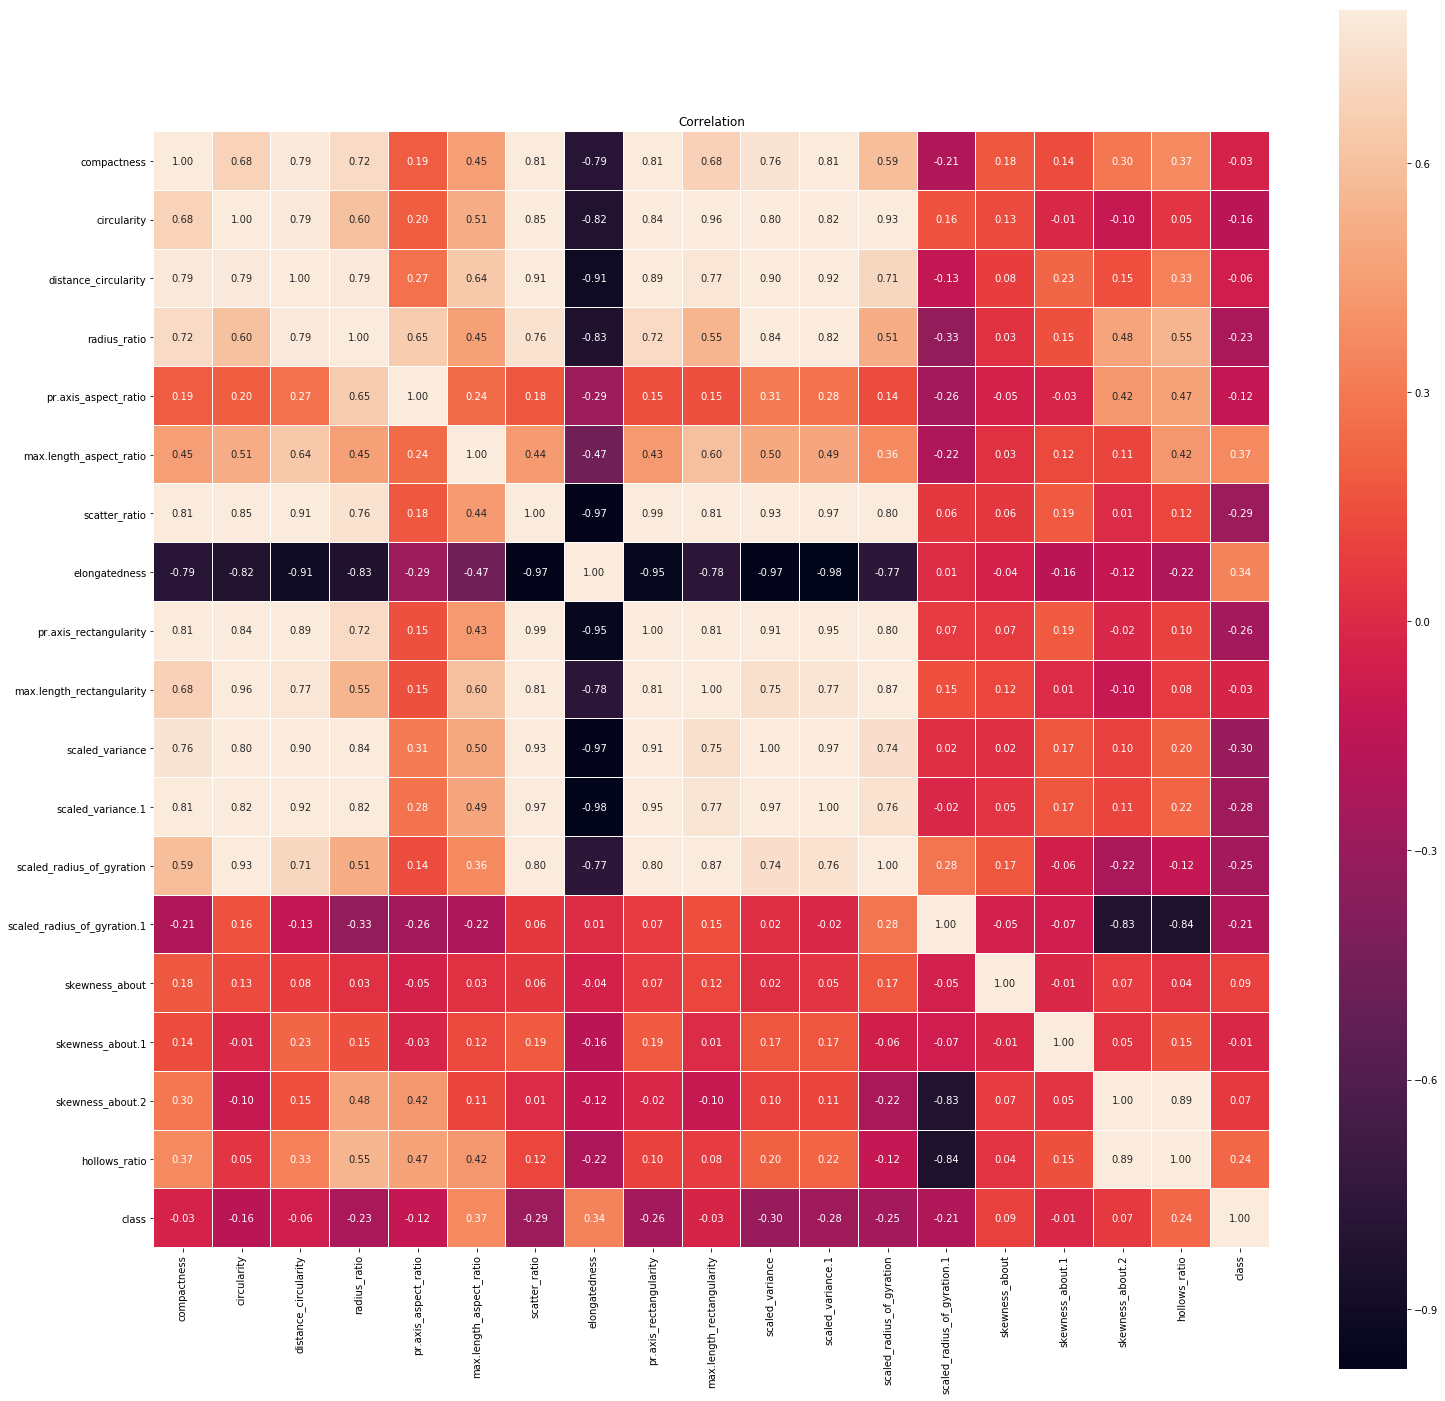

In [44]:
# Correlation Analysis
#Correlation Analysis for vehicle data frame which help us to find out correlation relation between different attributes in the data frame
plt.figure(figsize=(25, 25))
ax = sns.heatmap(vehicle_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Our Observation :

1. From Correlation matrix fig, we able to see there are multicollinearity in few of dependent features. This multicollinearity will impact out model performance. we will use PCA technique to reduce multicollinearity in the dimension.


#### Standardize the vehicle data 

In [47]:
#Since the dimensions of the data are not really known to us, it would be wise to standardize the data using standardscaler or z scores before we go for any modelling.
#we will use standardscaler function to do this for all dependent features.

#Drop 'Class' features
X = vehicle_df.drop(["class"], axis=1)
# Get Target variable in y
y = vehicle_df["class"]


In [48]:
#Standardize
# We transform (centralize) the entire X (independent variable data) to standardscaler transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)  
X_std

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.16058035,  0.51807313,  0.05717723, ...,  0.76971149,
        -0.31201194,  0.18395733],
       [-0.32546965, -0.62373151,  0.12074088, ...,  0.45829307,
         0.01326483,  0.45297703],
       [ 1.25419283,  0.84430302,  1.51914112, ..., -0.32025299,
        -0.14937355,  0.04944748],
       ...,
       [ 1.49721783,  1.49676282,  1.20132288, ..., -1.09879904,
        -0.31201194,  0.72199673],
       [-0.93303214, -1.43930625, -0.26064101, ...,  1.23683913,
         0.17590322, -0.08506238],
       [-1.05454464, -1.43930625, -1.02340478, ...,  1.08112991,
        -0.47465032, -0.75761164]])

### 3.Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [49]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72363025  0.19137131  0.44653943
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76316028  0.80729861
   0.58593517 -0.208933    0.18136625  0.13520812  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.60268818  0.19951607  0.51468196
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79992218  0.82088395
   0.92691166  0.15697682  0.13004031 -0.01083708 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79014847  0.27123439  0.63930919
   0.90614687 -0.9123854   0.89408198  0.77544391  0.90091105  0.91955536
   0.70660663 -0.13011644  0.08168992  0.22750277  0.14627113  0.33312625]
 [ 0.72363025  0.60268818  0.79014847  1.00118343  0.65013877  0.45381821
   0.75600469 -0.83184578  0.72431436  0.54705202  0.84429407  0.82258638
   0.51497187 -0.32564751  0.03402083  0.14737607  0.47987522  0.54988961]
 [ 0.19137131  0.19951607  0.27123439  0.65013877  1.00118343  0.24491928
   0.1805918

In [50]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.2716145   0.07769761  0.1920429   0.01053949 -0.10022201  0.24080904
   0.05694062 -0.81447328  0.2180321   0.26137571  0.05644393 -0.04682196
  -0.10495961 -0.05180177 -0.02265956  0.08366982 -0.06943703  0.0358564 ]
 [ 0.28536141 -0.15204866 -0.00657465  0.18907478  0.13022884 -0.0240613
  -0.40531947  0.02222042 -0.02115517 -0.03784056 -0.1492846  -0.26177158
  -0.1802509  -0.13443678 -0.03956553 -0.57783278 -0.43089856 -0.11383494]
 [ 0.30414749  0.02881815  0.05517439 -0.09123193  0.10227364  0.00491632
   0.1798686   0.15638277  0.12640996 -0.16839111  0.71681498 -0.48921013
   0.08231792  0.15036015 -0.01004986 -0.00520694 -0.00441489  0.03141129]
 [ 0.27090825  0.21545797 -0.18633294 -0.00286121 -0.22161964 -0.1303692
   0.13423886  0.04152686 -0.05215274  0.23784691 -0.19778739 -0.14744636
   0.65861598 -0.23381911 -0.03135337 -0.20666621  0.05296705  0.32327278]
 [ 0.10640273  0.2675529  -0.49452203  0.19228853 -0.18098886 -0.62485014
  -0.04844602 -0.1

In [51]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.720431599003827, array([ 0.2716145 ,  0.28536141,  0.30414749,  0.27090825,  0.10640273,
        0.18840262,  0.30824418, -0.31060653,  0.30396279,  0.27583581,
        0.30531848,  0.31059725,  0.25979746, -0.02090644,  0.03225738,
        0.05032325,  0.04634917,  0.09363578])), (3.345637120492715, array([ 0.07769761, -0.15204866,  0.02881815,  0.21545797,  0.2675529 ,
        0.1017544 , -0.08546352,  0.02455317, -0.09782799, -0.14366534,
       -0.02414196, -0.02314827, -0.22579905, -0.48951845,  0.00157686,
        0.06733238,  0.50580561,  0.50142655])), (1.1439245101842352, array([ 0.01053949,  0.18907478, -0.09123193, -0.00286121,  0.19228853,
        0.04180014, -0.10308907,  0.07738285, -0.10341507,  0.17689315,
       -0.09802184, -0.0896781 ,  0.21779201, -0.03563828,  0.43852209,
       -0.76921324,  0.08467195,  0.03115906])), (1.0966770228404383, array([ 0.1920429 , -0.00657465,  0.05517439, -0.18633294, -0.49452203,
        0.05226605,  0.02087978,  0.0514946 ,  0.0

In [52]:
## Step 4 (continued): Find variance and cumulative variance by each eigen vector
tot = sum(eigenvalues)
# an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
print("Variance Explained: \n", var_explained)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative Variance: \n", cum_var_exp)

Variance Explained: 
 [0.5393856515076324, 0.18564902592699903, 0.06347624186404503, 0.06085448412793338, 0.047938317872303716, 0.04099533956477153, 0.019547898778699252, 0.013024125793424655, 0.008695037190836323, 0.005118675775218326, 0.004332970133720428, 0.003191814454584277, 0.002271206905202683, 0.0020945880270892194, 0.0011757204649424523, 0.0010224367253862247, 0.0009150269710319122, 0.0003114379161790569]
Cumulative Variance: 
 [0.53938565 0.72503468 0.78851092 0.8493654  0.89730372 0.93829906
 0.95784696 0.97087109 0.97956612 0.9846848  0.98901777 0.99220958
 0.99448079 0.99657538 0.9977511  0.99877354 0.99968856 1.        ]


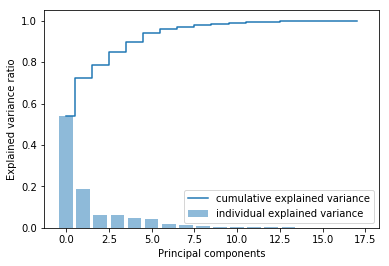

In [53]:
plt.bar(range(0,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# As per PCA vaiance analysis in the bar-steps chart, we able to see ~95% of variance are falling in the 7 componets. 
#So, let's select PCA n_components as 7

In [42]:
#Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [54]:
#PCA components has been selected as 7 as per explained variance ratio which contain ~95% of variance
pca = PCA(n_components=7)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
X_pca = pca.transform(X_std)

In [56]:
X_pca.shape

(846, 7)

In [57]:
#PCA Components
pca.components_

array([[-0.2716145 , -0.28536141, -0.30414749, -0.27090825, -0.10640273,
        -0.18840262, -0.30824418,  0.31060653, -0.30396279, -0.27583581,
        -0.30531848, -0.31059725, -0.25979746,  0.02090644, -0.03225738,
        -0.05032325, -0.04634917, -0.09363578],
       [-0.07769761,  0.15204866, -0.02881815, -0.21545797, -0.2675529 ,
        -0.1017544 ,  0.08546352, -0.02455317,  0.09782799,  0.14366534,
         0.02414196,  0.02314827,  0.22579905,  0.48951845, -0.00157686,
        -0.06733238, -0.50580561, -0.50142655],
       [ 0.01053949,  0.18907478, -0.09123193, -0.00286121,  0.19228853,
         0.04180014, -0.10308907,  0.07738285, -0.10341507,  0.17689315,
        -0.09802184, -0.0896781 ,  0.21779201, -0.03563828,  0.43852209,
        -0.76921324,  0.08467195,  0.03115906],
       [-0.1920429 ,  0.00657465, -0.05517439,  0.18633294,  0.49452203,
        -0.05226605, -0.02087978, -0.0514946 , -0.04505697, -0.03470482,
         0.08630399,  0.02999043,  0.00916015,  0.160

In [58]:
pca.explained_variance_

array([9.7204316 , 3.34563712, 1.14392451, 1.09667702, 0.86391089,
       0.73878939, 0.35227858])

In [59]:
pca.explained_variance_ratio_

array([0.53938565, 0.18564903, 0.06347624, 0.06085448, 0.04793832,
       0.04099534, 0.0195479 ])

In [60]:
df = pd.DataFrame(X_pca)

In [61]:
df.head()

0         1         2         3         4         5         6
0 -0.651621 -0.392285  0.143140  0.050780 -1.018269 -1.502120 -0.509278
1  1.476008 -0.166133  0.012757 -1.524187 -0.735676 -0.531007  0.410695
2 -4.053738  0.383898  0.876557 -0.145400  0.264995 -0.925366  0.886705
3  1.468191 -3.320480  0.478240 -0.426941 -0.807443  0.125242 -0.041540
4  0.448461  1.481581  0.721424  0.542468 -0.062866 -2.615092  1.265410

In [62]:
df = df.join(y)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


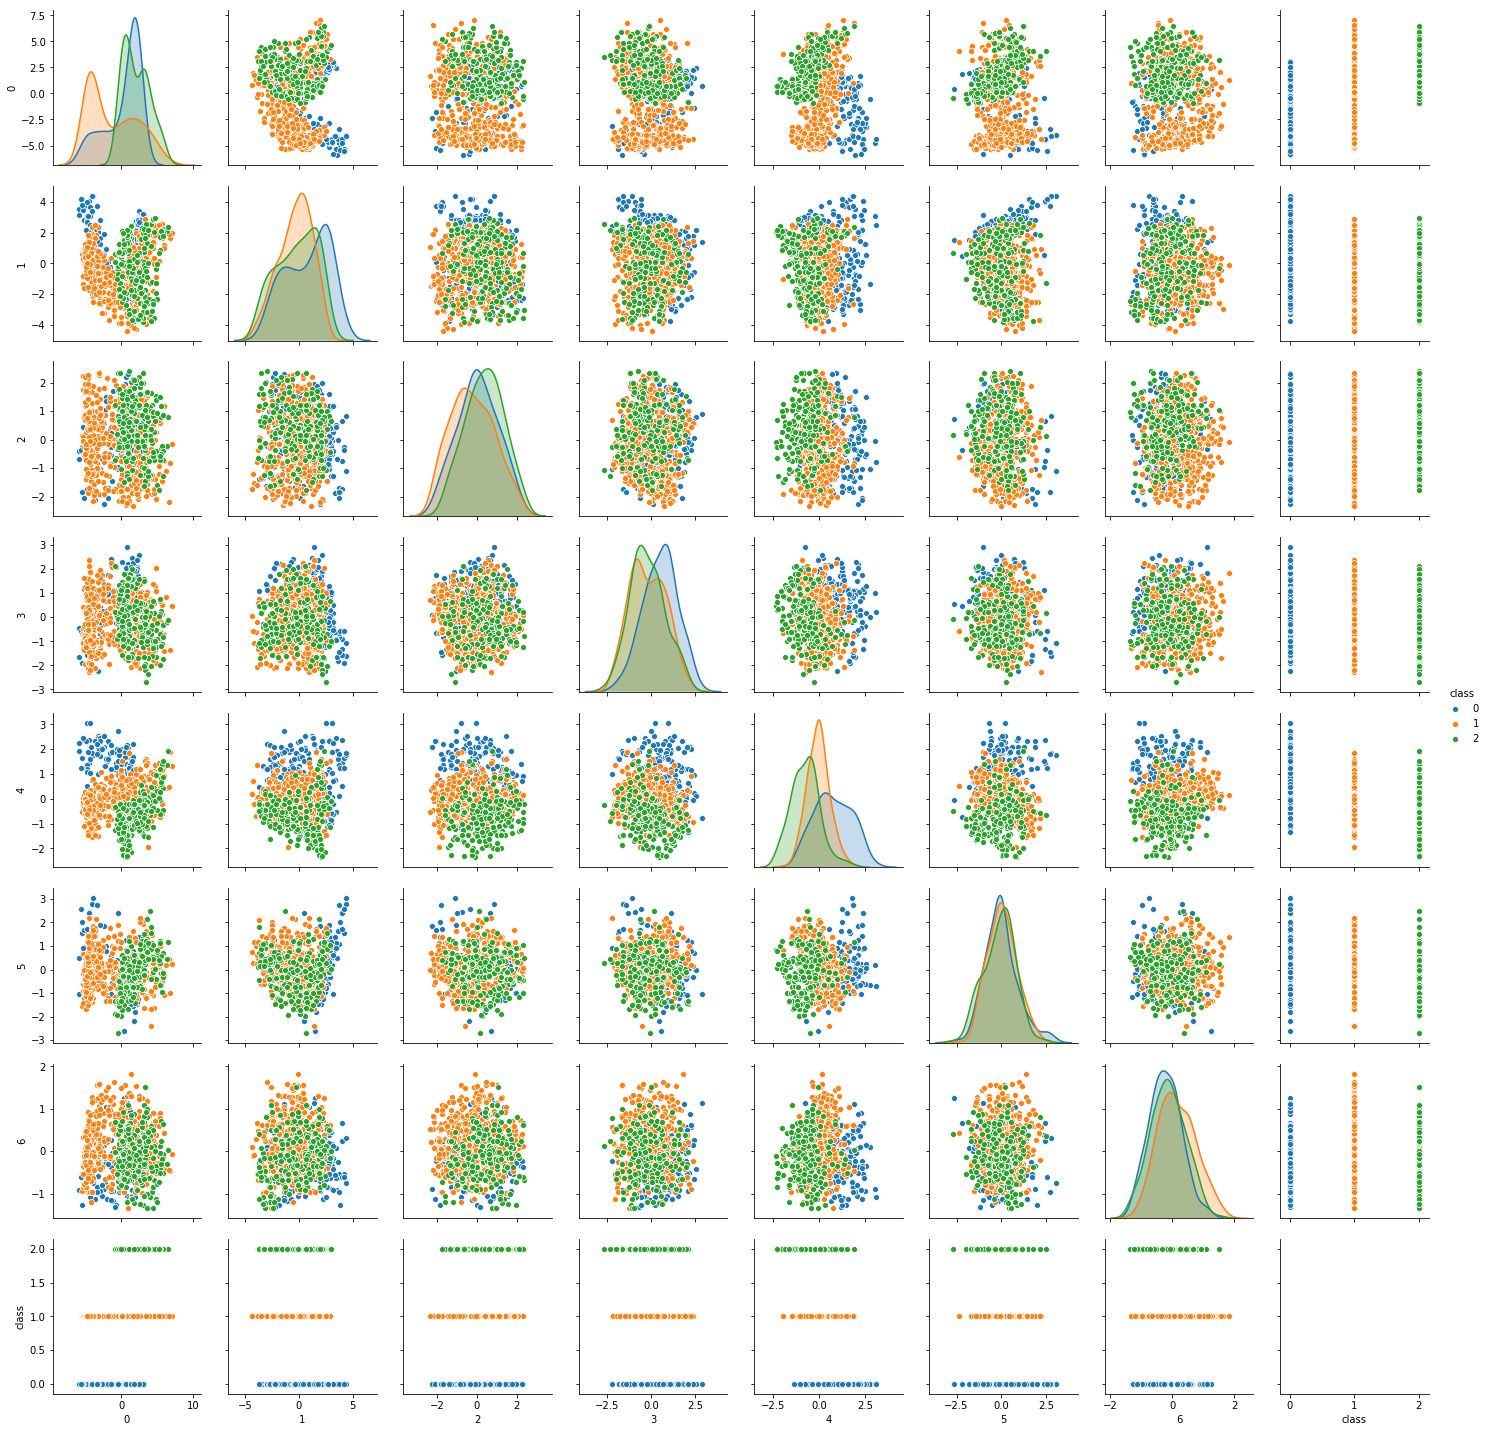

In [63]:
#Pair plot with PCA data
sns.pairplot(df, diag_kind='kde',hue='class') 

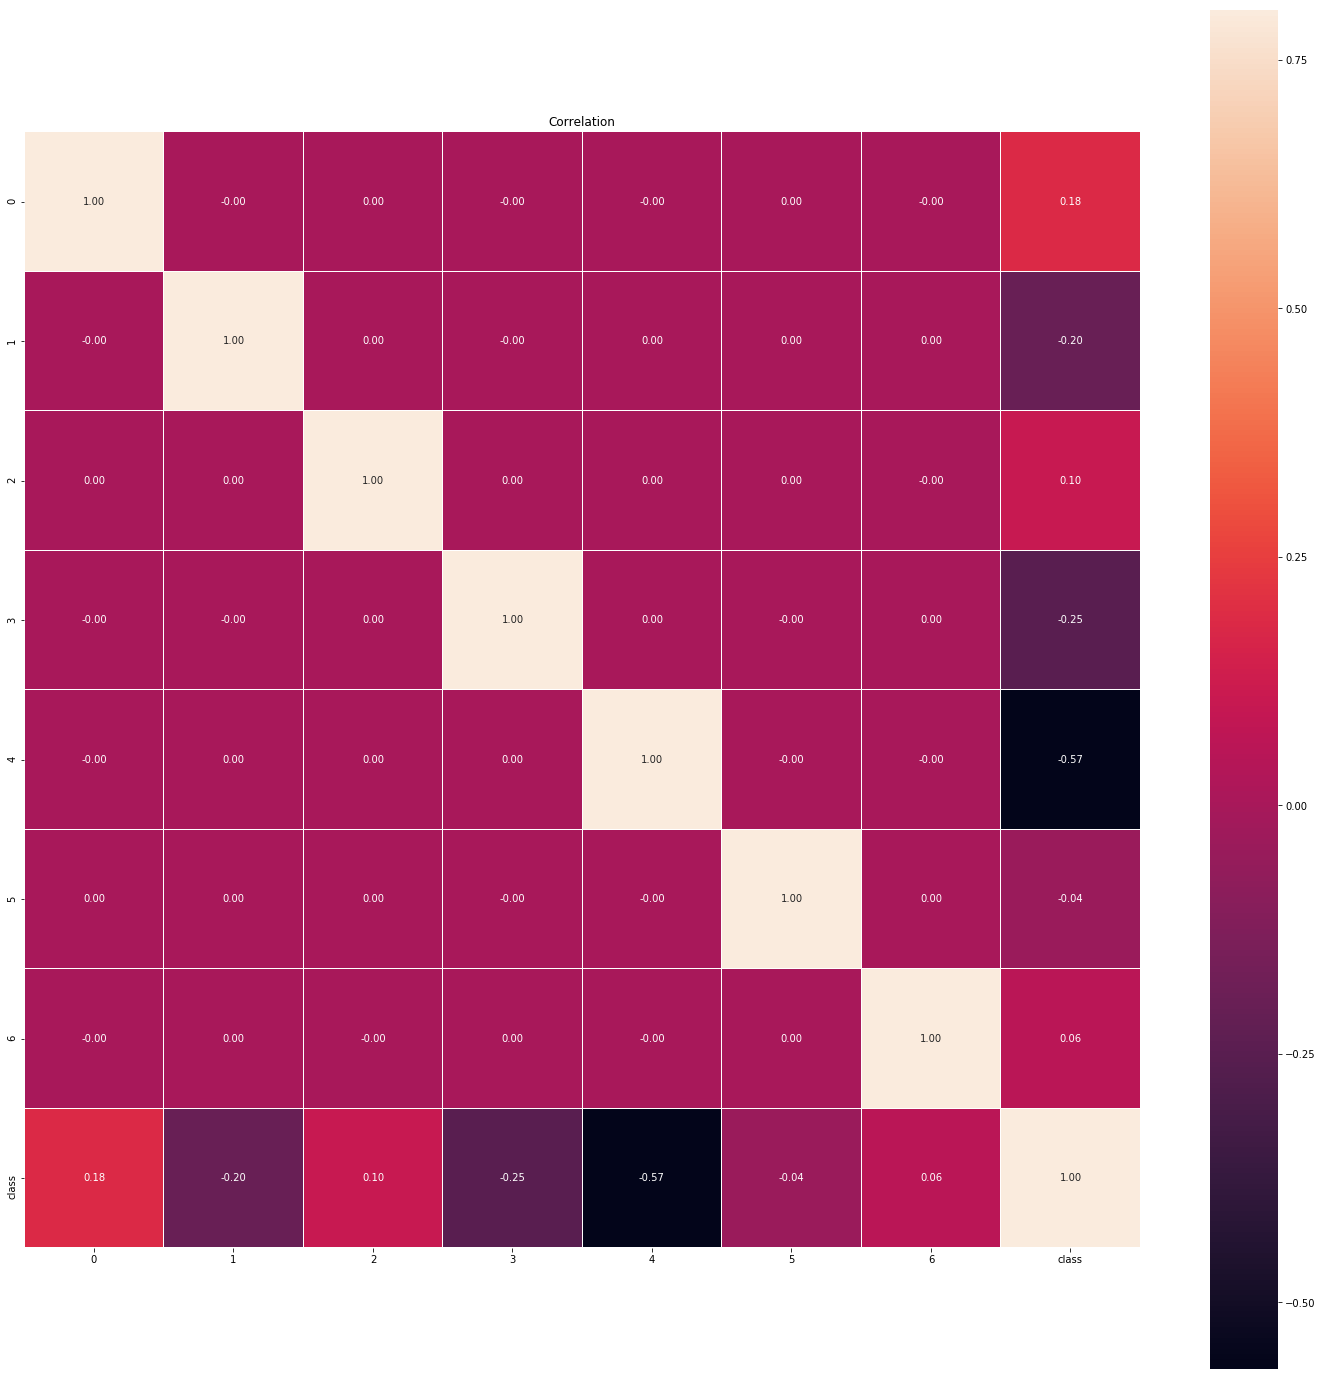

In [64]:
#Correlation Matrix After PCA
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [65]:
from sklearn.svm import SVC # "Support vector classifier"

In [66]:
# Get independent variable in X
X_pca = df.drop(["class"], axis=1)
# Get Target variable in y
y = df["class"]

In [67]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [68]:
print("Train Data Shape : {0}".format(X_train.shape))
print("Test Data Shape : {0}".format(X_test.shape))
print("Full Data Shape : {0}".format(X.shape))

Train Data Shape : (676, 18)
Test Data Shape : (170, 18)
Full Data Shape : (846, 18)


In [69]:
# This is a common function for Linear regression to test the model with K-Fold cross validation (with recall scoring).
#Here, we are doing 5 Fold cross validation (with recall scoring), this will help us for final model comparsion.
# This model return below parameter in the dataframe form:

# 1. Model Score : Default model accuracy
# 2. Recall Value : Calculated using sklearn.metrics.recall_score
# 3. Precision Value : Calcualted using sklearn.metrics.precision_score
# 4. F1 Score : Calcualted using sklearn.metrics.f1_score
# 4. K-Fold Cross Validation : Return mean value of 5-Fold CV score
# 5. K-Fold Cross Validation Accuracy : CV accuracy in percentage with std value

def fn_PredictTestData_CrossValidation_Metrics(modealName,modealDetails,model,xTest,yTest):
    model_Result=pd.DataFrame(index=["ModelName","Details","Score","Recall","Precision","F1-Score","5-Fold CV","Cross Validation Accuracy"])
    #Model Predict Test Data
    y_predict=model.predict(xTest)
    #Get Predicted Model Score
    modelscore = float(format(model.score(xTest,yTest),'.3f'))
    #Get Recall Value
    recall=recall_score(yTest, y_predict,average='weighted')
    #Precision Value
    precision=precision_score(yTest, y_predict, average='weighted')
    #F1-Score
    f1score=f1_score(yTest, y_predict, average='weighted')
    #K-Fold cross validation with 5 split
    kfold = KFold(n_splits=5, random_state=123)
    cv_score = cross_val_score(model,xTest,yTest,cv=kfold)
    #Get CV result mean value
    cv = float(format(np.mean(cv_score),'.3f'))
    #Get CV Accuracy
    cv_Accuracy=("%0.2f (+/- %0.2f)" % ((np.mean(cv_score)*100), np.std(cv_score) * 2))
    
    model_Result[modealName]=[modealName,modealDetails,modelscore,recall,precision,f1score,cv,cv_Accuracy]
     
    return model_Result

In [70]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear', gamma= 'auto')
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [71]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))


0.9526627218934911


In [72]:
print(svc_model.score(X_test, y_test))

0.9294117647058824


In [73]:
# Create Model_Result data frame which we use to save each model result for final evalution.
model_Result=pd.DataFrame(index=["ModelName","Details","Score","Recall","Precision","F1-Score","5-Fold CV","Cross Validation Accuracy"])

In [74]:
svm_Result_1=fn_PredictTestData_CrossValidation_Metrics ("Support Vector Machine","",svc_model,X_test, y_test)

In [75]:
model_Result["Model 1"]=svm_Result_1
svm_Result_1

Support Vector Machine
ModelName                  Support Vector Machine
Details                                          
Score                                       0.929
Recall                                   0.929412
Precision                                0.938109
F1-Score                                 0.930174
5-Fold CV                                   0.829
Cross Validation Accuracy        82.94 (+/- 0.14)

In [76]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [77]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.01, 0.05, 0.5, 1]    } ]

In [78]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [79]:
gs.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [92]:
print("SVC Grid Search CV - Best Parameter :\n {0}".format(gs.best_estimator_))

SVC Grid Search CV - Best Parameter :
 SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [85]:
gs.best_score_ 

0.9363905325443787

In [86]:
svc_model_GV = SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
svc_model_GV.fit(X_train, y_train)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [88]:
svm_Result_2=fn_PredictTestData_CrossValidation_Metrics ("Support Vector Machine","With GridSearch best param",svc_model_GV,X_test, y_test)

In [89]:
model_Result["Model 2"]=svm_Result_2
svm_Result_2

Support Vector Machine
ModelName                      Support Vector Machine
Details                    With GridSearch best param
Score                                           0.935
Recall                                       0.935294
Precision                                    0.939283
F1-Score                                     0.935874
5-Fold CV                                       0.847
Cross Validation Accuracy            84.71 (+/- 0.18)

### Final Conclusion:

In [90]:
# Sort consolidate model result with K-Fold score and select best model.
df_results=pd.DataFrame(data=model_Result.T)

df_results.sort_values(["5-Fold CV"],ascending=False,)

ModelName                     Details  Score    Recall  \
Model 2  Support Vector Machine  With GridSearch best param  0.935  0.935294   
Model 1  Support Vector Machine                              0.929  0.929412   

        Precision  F1-Score 5-Fold CV Cross Validation Accuracy  
Model 2  0.939283  0.935874     0.847          84.71 (+/- 0.18)  
Model 1  0.938109  0.930174     0.829          82.94 (+/- 0.14)

1. In our inital vehicle data frame we have 18 feature from this we have reduced feature dimension to 7 using PCA technique.
2. We have used PCA scalled data in our SVM model for this multi-class classification using 'Linear' kernal in the "Model-1", which return 92% accuracy and CV validation accuracy is 82.94% (+/- 0.14).
3. We have done grid search cv for SVM model with requested parameters and find out best hyper parameter.
4. From our GS best hyper parameter we have built model 2 in SVM and we received our best accuracy is 93% and our CV accuracy is 84.71%.
